In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [4]:
data=pd.read_csv('Downloads/dataset1.csv')

In [6]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


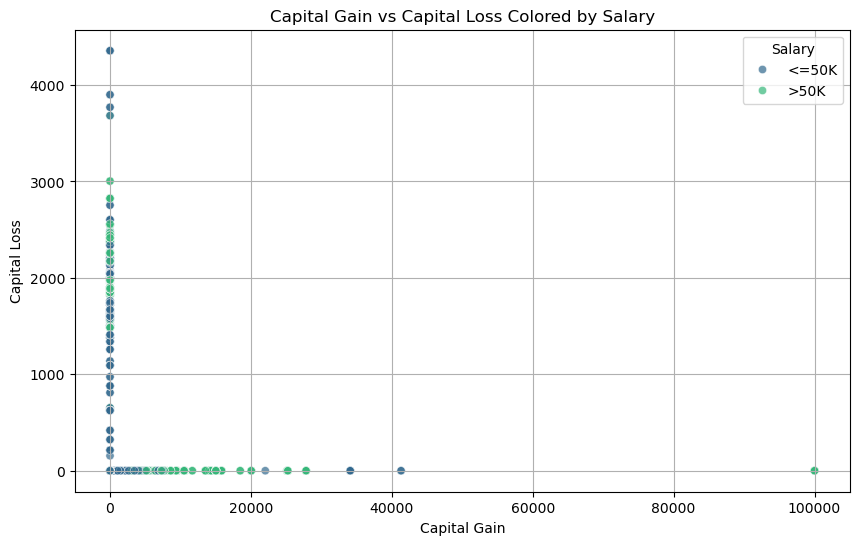

In [26]:
#Create a scatter plot of "capital-gain" vs. "capital-loss," color-coded by "salary." What does the plot reveal about the relationship between capital gains, capital losses, and income?
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='capital-gain', y='capital-loss', hue='salary', palette='viridis', alpha=0.7)
plt.title('Capital Gain vs Capital Loss Colored by Salary')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.legend(title='Salary')
plt.grid(True)
plt.show()


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


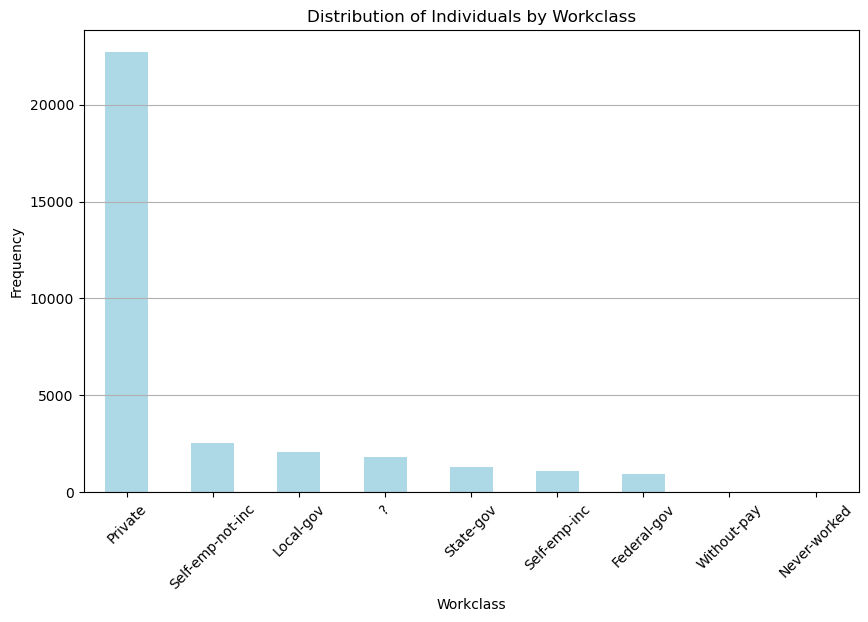

In [64]:
#Find the distribution of individuals across different "workclass." Which workclass category is the most common?
import matplotlib.pyplot as plt
workclass = data['workclass'].value_counts()
print(workclass)


plt.figure(figsize=(10, 6))
workclass.plot(kind='bar', color='lightblue')
plt.title('Distribution of Individuals by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


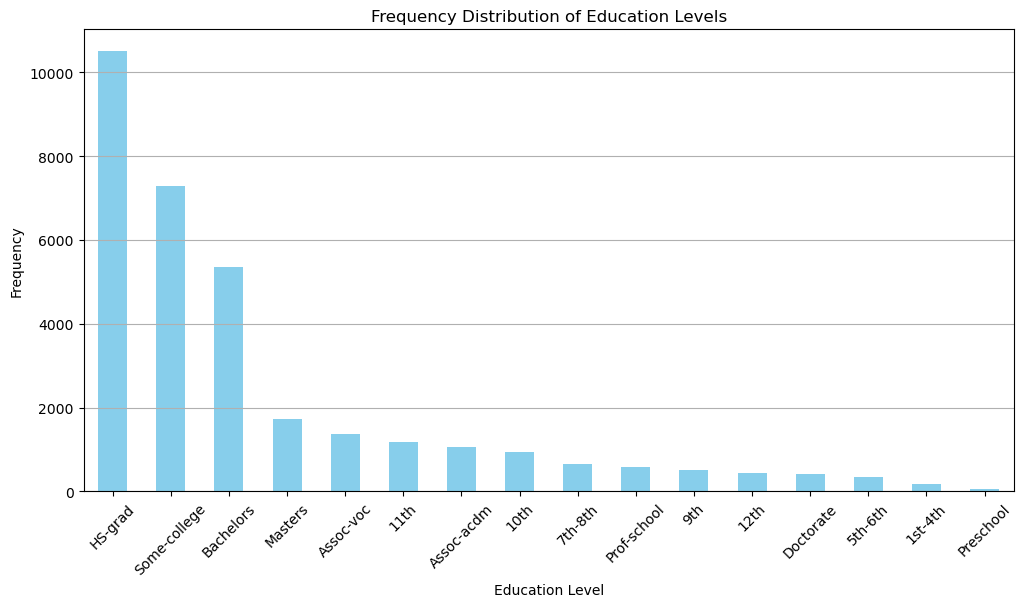

Most Common Education Level: HS-grad (Count: 10501)


In [88]:
#Analyze the frequency distribution of "education" levels. What is the most common education level, and how does it correlate with "salary" (<=50K or >50K)?
import matplotlib.pyplot as plt
import seaborn as sns
education_counts = data['education'].value_counts()
print(education_counts)
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



most_common_education = education_counts.idxmax()
most_common_count = education_counts.max()
print(f'Most Common Education Level: {most_common_education} (Count: {most_common_count})')








In [76]:
#How many unique "native-country" values are there in the dataset? Which country has the most individuals represented?
unique_countries_count = data['native-country'].nunique()
print(f'Number of Unique Native Countries: {unique_countries_count}')


Number of Unique Native Countries: 42


In [78]:
#Investigate the relationship between "education-num" and "salary." Do individuals with higher "education-num" values tend to earn more (>50K)?
most_common_country = data['native-country'].value_counts().idxmax()
most_common_country_count = data['native-country'].value_counts().max()
print(f'Most Common Native Country: {most_common_country} (Count: {most_common_country_count})')


Most Common Native Country: United-States (Count: 29170)


In [80]:

salary_by_education = data.groupby('education-num')['salary'].value_counts(normalize=True).unstack().fillna(0)
print(salary_by_education)


salary            <=50K      >50K
education-num                    
1              1.000000  0.000000
2              0.964286  0.035714
3              0.951952  0.048048
4              0.938080  0.061920
5              0.947471  0.052529
6              0.933548  0.066452
7              0.948936  0.051064
8              0.923788  0.076212
9              0.840491  0.159509
10             0.809765  0.190235
11             0.738784  0.261216
12             0.751640  0.248360
13             0.585247  0.414753
14             0.443413  0.556587
15             0.265625  0.734375
16             0.259080  0.740920


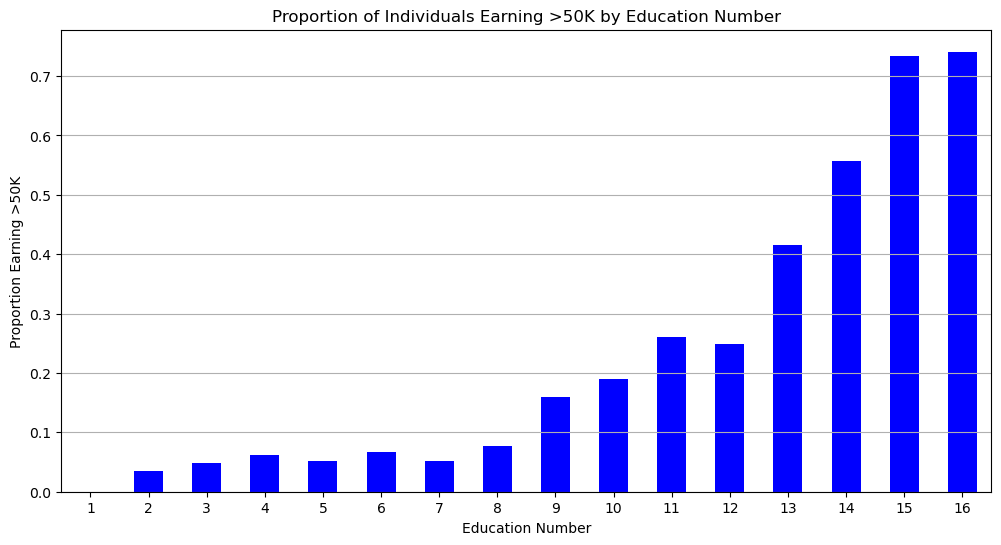

In [84]:
import matplotlib.pyplot as plt

salary_by_education['>50K'].plot(kind='bar', color='blue', figsize=(12, 6))
plt.title('Proportion of Individuals Earning >50K by Education Number')
plt.xlabel('Education Number')
plt.ylabel('Proportion Earning >50K')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [90]:
#Calculate the mean, median, and standard deviation of the "age" and "hours-per-week" columns. What do these values suggest about the distribution of ages and working hours in the dataset?

import pandas as pd


# Calculate mean, median, and standard deviation for age
age_mean = df['age'].mean()
age_median = df['age'].median()
age_std = df['age'].std()

# Calculate mean, median, and standard deviation for hours-per-week
hours_mean = df['hours-per-week'].mean()
hours_median = df['hours-per-week'].median()
hours_std = df['hours-per-week'].std()

print("Age:")
print(f"Mean: {age_mean}")
print(f"Median: {age_median}")
print(f"Standard Deviation: {age_std}\n")

print("Hours-per-week:")
print(f"Mean: {hours_mean}")
print(f"Median: {hours_median}")
print(f"Standard Deviation: {hours_std}")


Age:
Mean: 47.5
Median: 47.5
Standard Deviation: 15.138251770487457

Hours-per-week:
Mean: 41.5
Median: 41.0
Standard Deviation: 11.834506984051155
